In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import math
titanic_cols = [ 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 
                'cabin', 'embared', 'boat', 'body', 'home.dest']
titanic = pd.read_csv('titanic.csv',  header = 0, names = titanic_cols) # reading data

In [2]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embared,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,1,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,1,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,1,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic.shape

(1309, 14)

In [4]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,boat,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,0.371276,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,0.483331,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,1.000000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,328.000000


Text(0.5, 1.0, 'Not Survived vs Survived')

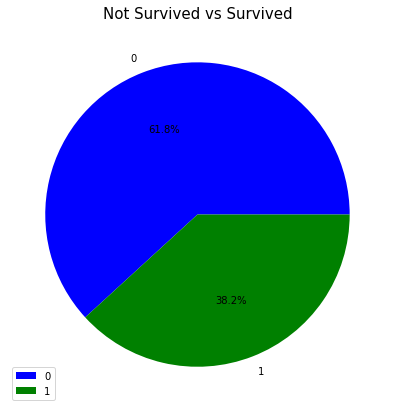

In [5]:
titanic.survived.dropna(inplace = True)
labels = titanic.survived.value_counts().index
colors = ['blue', 'green']
explode = [0,0]
sizes = titanic.survived.value_counts().values
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.legend()
plt.title('Not Survived vs Survived',color = 'black',fontsize = 15)

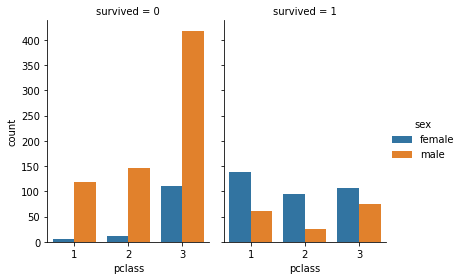

In [6]:
g = sns.catplot(x='pclass', hue='sex', col='survived',
                data=titanic, kind='count',
                height=4, aspect=.7);


In [7]:
def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'children'
    else:
        return sex

titanic['person'] = titanic[['age','sex']].apply(titanic_children,axis=1)

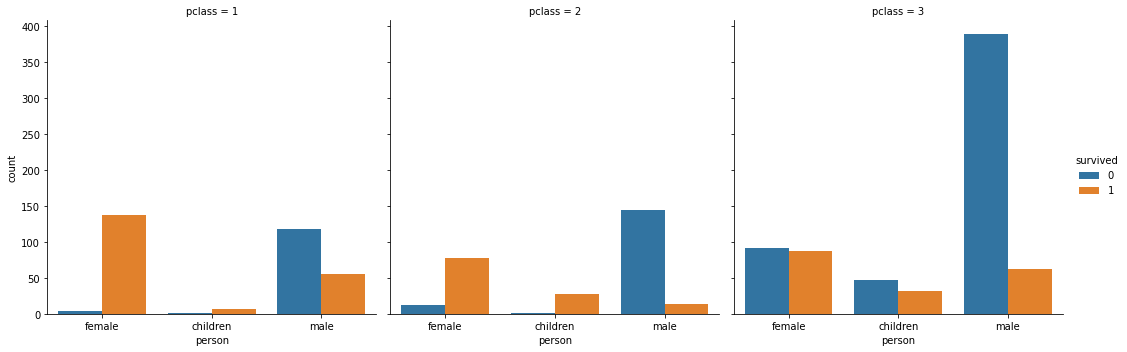

In [8]:
sns.catplot(x ='person', hue ='survived',  
kind ='count', col='pclass', data = titanic) 

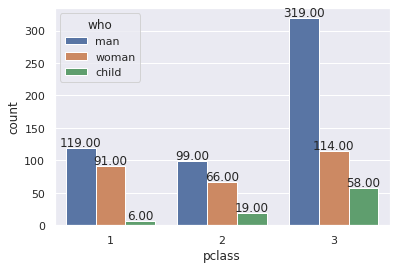

In [9]:
sns.set(style='darkgrid')
titanic = sns.load_dataset('titanic')
total = float(len(titanic)) 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x='pclass', hue='who', data=titanic) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


Text(0.5, 1.0, 'Age ')

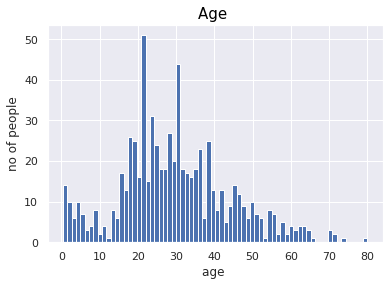

In [10]:
titanic['age'].hist(bins=70)
plt.xlabel("age ")
plt.ylabel("no of people")
plt.title('Age ',color = 'black',fontsize = 15)

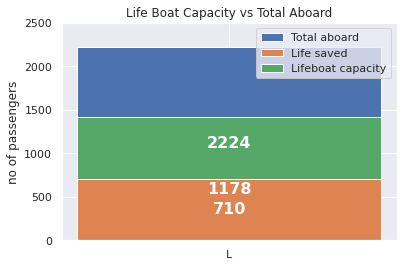

In [11]:
N = 1
totalaboard = (2224)
lifeboatcapacity = (1178)
lifesaved = (710)
ind = np.arange(N)    
width = 0.5     
p1 = plt.bar(ind, totalaboard, width)
p2 = plt.bar(ind, lifeboatcapacity, width)
p3 = plt.bar(ind, lifesaved, width, bottom=lifesaved)
plt.ylabel('no of passengers')
plt.title('Life Boat Capacity vs Total Aboard')
plt.xticks(ind, ('L'))
plt.yticks(np.arange(0, 3000, 500))
plt.legend((p1[0], p2[0], p3[0]), ('Total aboard', 'Life saved', 'Lifeboat capacity'))
for r1, r2, r3 in zip(p1, p2, p3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
    plt.text(r3.get_x() + r3.get_width() / 2., h3 / 2., "%d" % h3, ha="center", va="center", color="white", fontsize=16, fontweight="bold")
